## Installation

```
pip install networkx python-louvain
```

In [1]:
# Dependendencies

#!pip install networkx python-louvain

In [2]:
import networkx as nx

import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import collections
from community import community_louvain
from networkx.algorithms.community.centrality import girvan_newman
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
nx.__version__

'3.1'

In [ ]:
### USEFUL FUNCTIONS (DO NOT RUN!) ###

# Creates undirected graph
G = nx.Graph() 

# Creates directed graph
G = nx.DiGraph()

# Add a node '1'
G.add_node(1)

# Add multiple nodes at once
G.add_nodes_from(range(2,9))  

# Add edges b/w node-1 & node-2
G.add_edge(1,2)

# Add edges from a list of tuples
edges = [(2,3), (1,3), (4,1), (4,5), (5,6), (5,7), (6,7), (7,8), (6,8)]
G.add_edges_from(edges)

# Returns list of all nodes
G.nodes

# Get a specific node 
G.nodes['William Penn'] # → returns a dict containing all its attributes

# Plot graph in spring/circular shape
nx.draw_spring(G, with_labels=True,  alpha = 0.8)
nx.draw_circular(G, with_labels=True,  node_color='g', alpha = 0.8)

# Checks if graph is connected
nx.is_connected(G)

# Get diameter of graph
nx.diameter(G)

# Get sparsity of graph (edges/possible_edges)
nx.density(G)

# Get connected components of graph (each one is a list of nodes)  
conn_components = list(nx.connected_components(G)) # → returns a list of [list of nodes] i-e conn_comp

# Create subgraph from a subset of nodes
subG = G.subgraph([list of nodes]) 

# Get clustering coefficient of input nodes
nx.clustering(G, [list of nodes])

# Get degree of input nodes
G.degree([list of nodes]) → returns dict {node-1:degree, node-2:degree, …}
G.degree(G.nodes()) # for all nodes

# Get shortest path (a list of nodes) b/w two nodes in graph 
nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

# Create graph from a pd df → edge b/w vals from cols 'Source' & 'Target' of df
G = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using= nx.Graph()) 

# Assign attribute to nodes in graph
nx.set_node_attributes(graph,  <dict of node to attribute val e.,g {node-1: katz_val...}>,  <title/name of attribute>)

# Create a dict of index (node) to its attribute from a df
nodes_df.set_index('Name', inplace=True) → use 'Name' as index of df
nodes_df['Role'].to_dict() # → {node-1: role, node-2: role, …}
nx.set_node_attributes(G, nodes_df['Role'].to_dict(), 'Role' ) # → assigns attribute 'Role' to nodes

# Creates a random graph (Erdos-Renyi)
nx.gnm_random_graph(# of nodes, # of edges)

# Get centrality measure from graph
nx.katz_centrality(graph) # → returns a dict of katz centrality for each node {node-1: katz_val, node-2: katz_val, ...}
# same for nx.betweenness_centrality() 


## Introducting Networkx

NetworkX has a broad range of example networks that you can load with just a function call ([more examples here](https://networkx.github.io/documentation/stable/auto_examples/index.html)).

.. and a super friendly API that you can use to conviently build networks.

In order to get used to NetworkX API, let's just construct a simple **undirected graph**

### Creating and Visualizing a simple Undirected Graph

In [4]:
G = nx.Graph() # for a directed graph use nx.DiGraph()
G.add_node(1)
G.add_nodes_from(range(2,9))  # add multiple nodes at once

# add edges 
G.add_edge(1,2)
edges = [(2,3), (1,3), (4,1), (4,5), (5,6), (5,7), (6,7), (7,8), (6,8)]
G.add_edges_from(edges)
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8))

Did you like to get a quick overview of your dataset using `.describe()` in pandas ?
Here is the equivalent in NetworkX:

In [5]:
print(G)

Graph with 8 nodes and 10 edges


The library also has a built-in plotting engine (based on matplotlib).

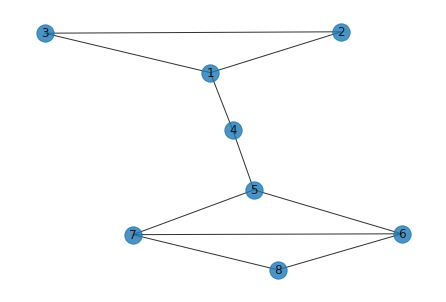

In [6]:
# plot it out
# for different layouts, please see: https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout
nx.draw_spring(G, with_labels=True,  alpha = 0.8)

In [7]:
# Helper function for plotting the degree distribution of a Graph
def plot_degree_distribution(G):
    degrees = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degrees:
            degrees[degree] = 0
        degrees[degree] += 1
    sorted_degree = sorted(degrees.items())
    deg = [k for (k,v) in sorted_degree]
    cnt = [v for (k,v) in sorted_degree]
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.05 for d in deg])
    ax.set_xticklabels(deg)

In [8]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(G)
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

In [9]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    plt.axis('off')

### Creating and Visualizing an Erdős–Rényi graph

Graph with 10 nodes and 20 edges
Avg. Shortest Path Length: 1.6222
Diameter: 3.0000
Sparsity: 0.4444
Global clustering coefficient aka Transitivity: 0.3971


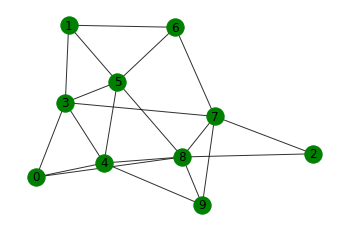

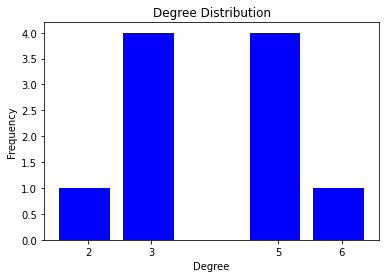

In [10]:
n = 10  # 10 nodes
m = 20  # 20 edges

erG = nx.gnm_random_graph(n, m)

describe_graph(erG)
visualize_graph(erG, k=0.05, alpha=0.8)
plot_degree_distribution(erG)

### Creating and Visualizing the Zachary's Karate Club Network

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
Avg. Shortest Path Length: 2.4082
Diameter: 5.0000
Sparsity: 0.1390
Global clustering coefficient aka Transitivity: 0.2557


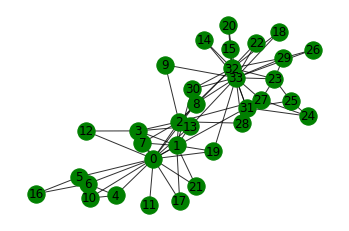

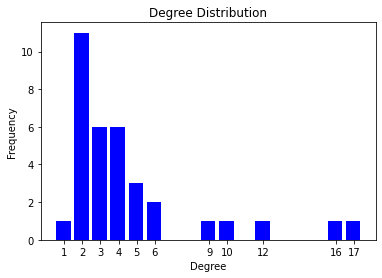

In [11]:
karateG = nx.karate_club_graph()
describe_graph(karateG)
visualize_graph(karateG, k=0.05, alpha=0.8)
plot_degree_distribution(karateG)

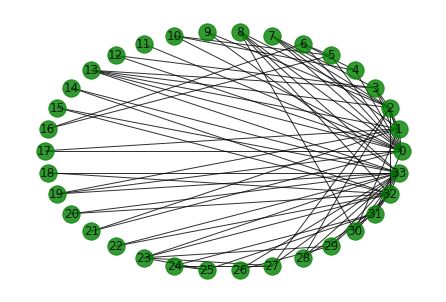

In [12]:
# Draw the graph with a circular layout instead?
nx.draw_circular(karateG, with_labels=True,  node_color='g', alpha = 0.8)

## Section 2: Quakers !

Let's now go beyond toy examples and load real data! 

England, in the mid-17th century. A novel group of Protestant Christians, called "Religious Society of Friends" dissent from the main doctrine. Their members are known as the "Quakers". This dataset is derived from the ["Oxford Dictionary of National Biography"](http://www.oxforddnb.com/) and from the ongoing work of the *"Six Degrees of Francis Bacon project"*, which is reconstructing the social networks of early modern Britain (1500-1700) to trace the personal relationships among figures like **Bacon**, **Shakespeare**, **Sir Isaac Newton** and many others.

[Credits](https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python)

### Meet the Quakers

In [13]:
data_folder = './data/quakers/'
nodes = pd.read_csv(data_folder + 'quakers_nodelist.csv') # each row is a node
nodes.head(10)

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
5,William Mucklow,religious writer,male,1630,1713,10008595
6,Thomas Salthouse,Quaker preacher and writer,male,1630,1691,10010643
7,William Dewsbury,Quaker activist,male,1621,1688,10003478
8,John Audland,Quaker preacher,male,1630,1664,10000411
9,Richard Claridge,Quaker minister and schoolmaster,male,1649,1723,10002469


In [14]:
nodes.Gender = nodes.Gender.astype('category')
nodes = nodes.rename({'Historical Significance': 'Role'}, axis = 1)
print('There are ', len(nodes), 'quakers')

There are  119 quakers


In [15]:
nodes['Role'].isna().sum()

2

In [16]:
# some don't have a known 'historical significance' or 'role'
nodes['Role'].fillna('Unknown', inplace=True)

In [17]:
# check if the names are unique
len(nodes['Name'].unique()) == len(nodes)

True

In [18]:
# since the names are unique, index based on names (important! will be used later when we assign attributes to nodes)
nodes.set_index('Name', inplace=True)

# let's also add a new attribute based on the role column. Is (s)he a directly involved Quaker or not? 
nodes['Quaker'] = ['quaker' in role.lower() for role in nodes.Role]
nodes.head()

,Role,Gender,Birthdate,Deathdate,ID,Quaker
Name,,,,,,
Joseph Wyeth,religious writer,male,1663,1731,10013191,False
Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149,False
James Logan,colonial official and scholar,male,1674,1751,10007567,False
Dorcas Erbery,Quaker preacher,female,1656,1659,10003983,True
Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152,True


In [19]:
# let's see which quaker knows whom, this will translate into edges in our graph
edges = pd.read_csv(data_folder + 'quakers_edgelist.csv')
edges.head()

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [20]:
print('There are',len(edges), 'edges')

There are 174 edges


### The Quaker network

Now we have all the ingredients and more to translate this data into a network: nodes are the quakers and there exists an edge between two quakers if they know each other. Since being acquainted or friends is a symmetric relation, we will build an undirected graph.

Another bonus of NetworkX is the smooth integration with panda dataframes, which makes loading the network a one-liner.   
*Note: Only if you don't have isolated nodes*

In [21]:
quakerG =nx.from_pandas_edgelist(edges, 'Source', 'Target', edge_attr=None, create_using= nx.Graph()) # 'Source', 'Target' are cols of edges df
describe_graph(quakerG)

Graph with 119 nodes and 174 edges
Graph is not connected
Diameter and Avg shortest path length are not defined!
Sparsity: 0.0248
Global clustering coefficient aka Transitivity: 0.1694


In [22]:
# each row of this df is a node with index=Name
nodes

,Role,Gender,Birthdate,Deathdate,ID,Quaker
Name,,,,,,
Joseph Wyeth,religious writer,male,1663,1731,10013191,False
Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149,False
James Logan,colonial official and scholar,male,1674,1751,10007567,False
Dorcas Erbery,Quaker preacher,female,1656,1659,10003983,True
Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152,True
...,...,...,...,...,...,...
Thomas Ellwood,religious controversialist,male,1639,1713,10003945,False
William Simpson,Quaker preacher,male,1627,1671,10011114,True
Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390,True


In [23]:
# using index ('Name') of 'nodes' pd, it creates a dict with 'Name':'Role' as key,val
nodes['Role'].to_dict()

{'Joseph Wyeth': 'religious writer',
 'Alexander Skene of Newtyle': 'local politician and author',
 'James Logan': 'colonial official and scholar',
 'Dorcas Erbery': 'Quaker preacher',
 'Lilias Skene': 'Quaker preacher and poet',
 'William Mucklow': 'religious writer',
 'Thomas Salthouse': 'Quaker preacher and writer',
 'William Dewsbury': 'Quaker activist',
 'John Audland': 'Quaker preacher',
 'Richard Claridge': 'Quaker minister and schoolmaster',
 'William Bradford': 'printer',
 'Fettiplace Bellers': 'philosophical writer and playwright',
 'John Bellers': 'political economist and cloth merchant',
 'Isabel Yeamans': 'Quaker preacher',
 'George Fox the younger': 'religious writer',
 'George Fox': ' a founder of the Religious Society of Friends (Quakers)',
 'John Stubbs': 'Quaker minister',
 'Anne Camm': 'Quaker preacher',
 'John Camm': 'Quaker preacher',
 'Thomas Camm': 'Quaker preacher and writer',
 'Katharine Evans': 'Quaker missionary',
 'Lydia Lancaster': 'Quaker minister',
 'Samu

In [24]:
# add node attributes by passing dictionary of type name -> attribute
'''
nodes['Role'].to_dict() --> converts to dicts for each index ('Name'). E.g, [{'Joseph Wyeth: 'religion writer'}, ...])

'''
nx.set_node_attributes(quakerG, nodes['Role'].to_dict(), 'Role' )
nx.set_node_attributes(quakerG, nodes['Gender'].to_dict(), 'Gender' )
nx.set_node_attributes(quakerG, nodes['Birthdate'].to_dict(), 'Birthdate' )
nx.set_node_attributes(quakerG, nodes['Deathdate'].to_dict(), 'Deathdate' )
nx.set_node_attributes(quakerG, nodes['Quaker'].to_dict(), 'Quaker' )

In [25]:
# You can easily get the attributes of a node
quakerG.nodes['William Penn']

{'Role': 'Quaker leader and founder of Pennsylvania',
 'Gender': 'male',
 'Birthdate': 1644,
 'Deathdate': 1718,
 'Quaker': True}

### How connected is the quaker network ?  

To get a feel of the network, we could start by visually inspecting the graph. 

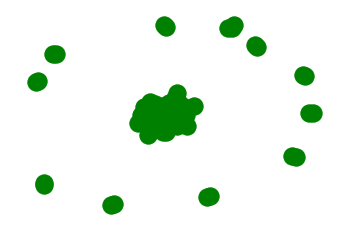

In [26]:
visualize_graph(quakerG, False, k=0.05, alpha=0.4)

Let's try to make the visualization a bit better...

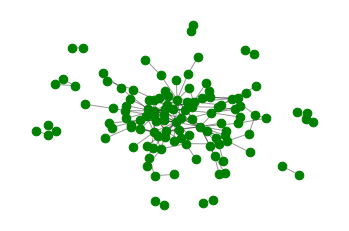

In [27]:
visualize_graph(quakerG, False, k=0.2, alpha=0.4, node_shape='.')

Still not a very pretty visualisation (.. install  [Gephy](https://gephi.org/) for some better-looking plots). However, a few things come across:

* The graph is not connected (there are a few isolated communities)
* There seem to be a few nodes with many connections (i.e. hubs)

That's as far as we can get, let's revert to **numbers and graph properties** for more insights!

### Sparsity
"Sparsity" of a graph with $n$ nodes is defined as follows: 

$ L = \frac{|E|}{|E_{max}|}$, where $E_{max} = \frac{n * (n-1)}{2}$

In [28]:
# 174 * (2) / ( 119* 118)
print("Network sparsity: %.4f" %nx.density(quakerG))

Network sparsity: 0.0248


### Connected Components
If the graph is not connected, how many "connected components" are there ?

In [29]:
print(nx.is_connected(quakerG)) # built-in func
comp = list(nx.connected_components(quakerG)) # built-in func --> returns a list of [list of nodes] i-e connected components
print('The graph contains', len(comp), 'connected components')

False
The graph contains 12 connected components


In [30]:
largest_comp = max(comp, key=len) # each item in list is a list, so it used len to find one with max len
percentage_lcc = len(largest_comp)/quakerG.number_of_nodes() * 100
print('The largest component has', len(largest_comp), 'nodes', 'accounting for %.2f'% percentage_lcc, '% of the nodes') 

The largest component has 96 nodes accounting for 80.67 % of the nodes


From visually inspecting the graph, we already saw that most of the nodes are in the largest component, which is often the case in a graph. That is why we usually call this component as a **giant component**.

### Diameter and Shortest Paths
Suppose I want to find the shortest path between two quakers, given that they are in the same connected component

In [31]:
fell_whitehead_path = nx.shortest_path(quakerG, source="Margaret Fell", target="George Whitehead")
print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [32]:
# take the largest component and analyse its diameter = longest shortest-path
lcc_quakerG = quakerG.subgraph(largest_comp) # built-in func --> input: list of nodes
print("The diameter of the largest connected component is", nx.diameter(lcc_quakerG))
print("The avg shortest path length of the largest connected component is", nx.average_shortest_path_length(lcc_quakerG))

The diameter of the largest connected component is 8
The avg shortest path length of the largest connected component is 3.3789473684210525


### A more social look at the network!

**Triadic Closure:**   
    A *friend* of my *friend* is my *friend*   
    OR   
    *quaker_1* knows *quaker_2* and *quaker_2* knows *quaker_3*, how likely is that *quaker_1* and *quaker_3* know each other?

Employ a **global** measure called **transitivity** (aka global clustering coefficient), or the ratio of all existing triangles (closed triples) over all possible triangles (open and closed triplets).

In [33]:
print('%.4f' %nx.transitivity(quakerG)) # built-in func

0.1694


Employ a **local** measure called **clustering coefficient**, which quantifies for a node how close its neighbours are to being a clique (complete graph). Measured as the ratio of, the number of edges to the number of all possible edges, among the neighbors of a node.

In [34]:
# Similar measure but for individual nodes called clustering coefficient
print(nx.clustering(quakerG, ['Alexander Parker', 'John Crook'])) # built-in func --> return clustering coeff for each input node

{'Alexander Parker': 0.06666666666666667, 'John Crook': 0.8333333333333334}


In [35]:
# Lets check by looking at the subgraphs induced by Alex and John
subgraph_Alex = quakerG.subgraph(['Alexander Parker']+list(quakerG.neighbors('Alexander Parker'))) # built-in func --> return neighbor nodes
subgraph_John = quakerG.subgraph(['John Crook']+list(quakerG.neighbors('John Crook')))

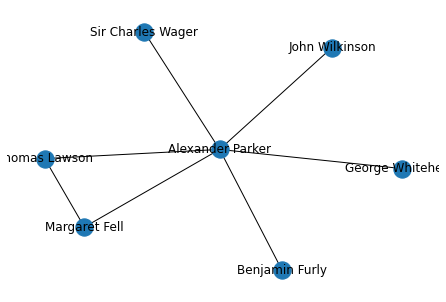

In [36]:
nx.draw_spring(subgraph_Alex, with_labels=True)

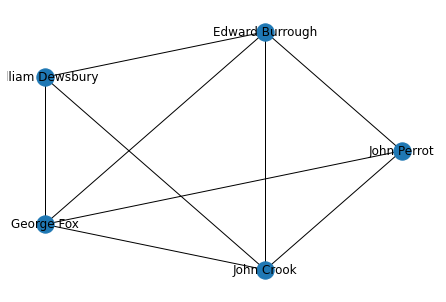

In [37]:
nx.draw_circular(subgraph_John, with_labels=True)

### Which quakers are the most important ?

As always, the answer is ... it depends. There are many ways to detect important nodes in a graph, for example based on:

* **Degree** (generalized by **Katz**)
* **Betweeness centrality**
* More ...

#### Degree: the more people you know, the more important you are!

In [38]:
quakerG.degree(quakerG.nodes()) # --> return degree for input nodes which here is all nodes

DegreeView({'George Keith': 8, 'Robert Barclay': 3, 'Benjamin Furly': 10, 'Anne Conway Viscountess Conway and Killultagh': 1, 'Franciscus Mercurius van Helmont': 2, 'William Penn': 18, 'George Fox': 22, 'George Whitehead': 13, 'William Bradford': 3, 'James Parnel': 2, 'Stephen Crisp': 3, 'Peter Collinson': 2, 'John Bartram': 2, 'James Logan': 4, 'Joseph Wyeth': 1, 'Thomas Ellwood': 8, 'Alexander Skene of Newtyle': 1, 'Lilias Skene': 1, 'Dorcas Erbery': 1, 'James Nayler': 16, 'William Mucklow': 1, 'William Dewsbury': 3, 'Edward Burrough': 9, 'John Crook': 4, 'John Audland': 6, 'John Camm': 4, 'Francis Howgill': 7, 'Edward Pyott': 2, 'Charles Marshall': 3, 'Anne Camm': 2, 'Martha Simmonds': 3, 'Richard Farnworth': 6, 'William Crouch': 2, 'Tace Sowle': 3, 'John Bellers': 1, 'Fettiplace Bellers': 1, 'William Rogers': 2, 'Hannah Stranger': 2, 'Isabel Yeamans': 1, 'George Fox the younger': 1, 'Margaret Fell': 13, 'Ellis Hookes': 1, 'William Mead': 2, 'Elizabeth Hooten': 1, 'Thomas Salthouse'

In [42]:
degrees = dict(quakerG.degree(quakerG.nodes()))
sorted_degree = sorted(degrees.items(), key=itemgetter(1), reverse=True) # creates sorted tuples of [(node, degree), (., .), ...]

# And the top 5 most popular quakers are.. 
for quaker, degree in sorted_degree[:5]:
    print(quaker, 'who is', quakerG.nodes[quaker]['Role'], 'knows', degree, 'people')

George Fox who is  a founder of the Religious Society of Friends (Quakers) knows 22 people
William Penn who is Quaker leader and founder of Pennsylvania knows 18 people
James Nayler who is Quaker preacher and writer knows 16 people
George Whitehead who is Quaker leader and writer knows 13 people
Margaret Fell who is Quaker leader knows 13 people


Let's also analyze the *degree distribution*. 
We can see that most of the people know less than 5 quakers and there are some *leaders that are comparatively very popular*. 

Text(0.5, 1.0, 'Degree distribution for the Quaker network')

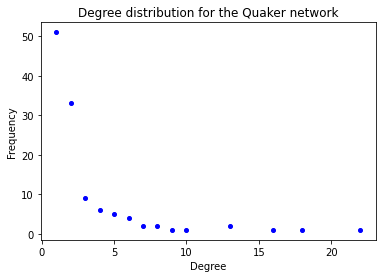

In [43]:
degree_seq = [d[1] for d in sorted_degree]
degreeCount = collections.Counter(degree_seq)
degreeCount = pd.DataFrame.from_dict(degreeCount, orient='index').reset_index()
fig = plt.figure()
ax = plt.gca()
ax.plot(degreeCount['index'], degreeCount[0], 'o', c='blue', markersize= 4)
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.title('Degree distribution for the Quaker network')

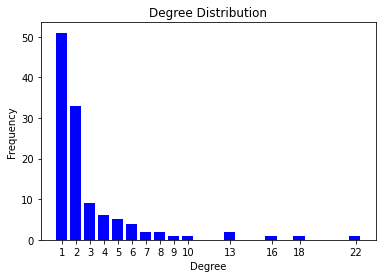

In [44]:
# As a bar plot
plot_degree_distribution(quakerG)

#### What about the Katz Centrality (the generalization over degree centrality)?

In [49]:
'''
- nx.katz_centrality(graph) --> returns a dict of katz centrality for each node {node-1: katz_val, node-2: katz_val, ...}
- nx.set_node_attributes(graph,  <dict of node to a attribute val e.,g {node-1: katz_val...}>,  <title/name of attribute>)

- sorted(katz.items(), key=itemgetter(1), reverse=True)
    - katz.items() --> return (key,val) tuple i-e (node, katz)
    - itemgetter(1): 
        - it is a built-in func 
        - extracts the 2nd element (index 1) of each tuple (i.e. katz val).
        - ensures that sorting is done based on the values of the dictionary (i-e katz val) rather than the keys (node).


'''
degrees = dict(quakerG.degree(quakerG.nodes())) # quakerG.degree() returns a list of tuples [(node-1, degree), (node-2, degree), ...] --> dict() converts it to a dict {node-1:degree, node-2:degree, ...}

katz = nx.katz_centrality(quakerG) # return dict of {node-1: katz_val, ...}
nx.set_node_attributes(quakerG, katz, 'katz') # assigns each node attribute titled 'katz' based on katz dict {node-1: katz_val, ...}
sorted_katz = sorted(katz.items(), key=itemgetter(1), reverse=True) # return sorted list of tuples (node-1, katz),..

# And the top 5 most popular quakers are.. 
for quaker, katzc in sorted_katz[:5]:
    print(quaker, 'who is', quakerG.nodes[quaker]['Role'], 'has katz-centrality: %.3f' %katzc)

{'George Keith': 8, 'Robert Barclay': 3, 'Benjamin Furly': 10, 'Anne Conway Viscountess Conway and Killultagh': 1, 'Franciscus Mercurius van Helmont': 2, 'William Penn': 18, 'George Fox': 22, 'George Whitehead': 13, 'William Bradford': 3, 'James Parnel': 2, 'Stephen Crisp': 3, 'Peter Collinson': 2, 'John Bartram': 2, 'James Logan': 4, 'Joseph Wyeth': 1, 'Thomas Ellwood': 8, 'Alexander Skene of Newtyle': 1, 'Lilias Skene': 1, 'Dorcas Erbery': 1, 'James Nayler': 16, 'William Mucklow': 1, 'William Dewsbury': 3, 'Edward Burrough': 9, 'John Crook': 4, 'John Audland': 6, 'John Camm': 4, 'Francis Howgill': 7, 'Edward Pyott': 2, 'Charles Marshall': 3, 'Anne Camm': 2, 'Martha Simmonds': 3, 'Richard Farnworth': 6, 'William Crouch': 2, 'Tace Sowle': 3, 'John Bellers': 1, 'Fettiplace Bellers': 1, 'William Rogers': 2, 'Hannah Stranger': 2, 'Isabel Yeamans': 1, 'George Fox the younger': 1, 'Margaret Fell': 13, 'Ellis Hookes': 1, 'William Mead': 2, 'Elizabeth Hooten': 1, 'Thomas Salthouse': 2, 'John 

Note: this is an undirected graph. If you were to have a **directed** one, use separate metrics for **indegree** and **outdegree**.

#### Betweeness centrality: the more shortest paths pass through a node, the more important it is!

In [43]:
# Compute betweenness centrality
betweenness = nx.betweenness_centrality(quakerG) # return dict of {node-1: betweenness_val, ...}
# Assign the computed centrality values as a node-attribute in your network
nx.set_node_attributes(quakerG, betweenness, 'betweenness')
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

for quaker, bw in sorted_betweenness[:5]:
    print(quaker, 'who is', quakerG.nodes[quaker]['Role'], 'has betweeness: %.3f' %bw)

William Penn who is Quaker leader and founder of Pennsylvania has betweeness: 0.240
George Fox who is  a founder of the Religious Society of Friends (Quakers) has betweeness: 0.237
George Whitehead who is Quaker leader and writer has betweeness: 0.126
Margaret Fell who is Quaker leader has betweeness: 0.121
James Nayler who is Quaker preacher and writer has betweeness: 0.104


Let's analyze the betweeness centrality values for all the nodes in the network. As in the case with degree, there are a *few nodes with very high betweeness centrality*, while most of them have a low value.

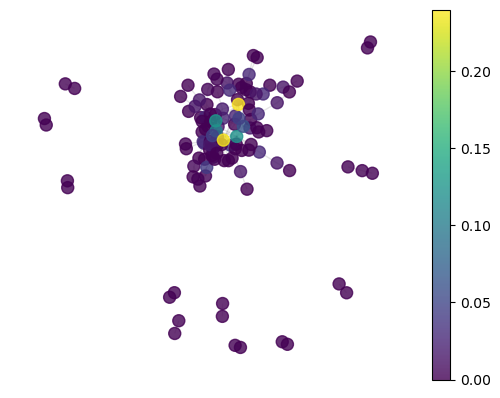

In [44]:
# similar pattern
list_nodes =list(quakerG.nodes())
list_nodes.reverse()   # for showing the nodes with high betweeness centrality 
pos = nx.spring_layout(quakerG)
ec = nx.draw_networkx_edges(quakerG, pos, alpha=0.1)
nc = nx.draw_networkx_nodes(quakerG, pos, nodelist=list_nodes, node_color=[quakerG.nodes[n]["betweenness"] for n in list_nodes], 
                            alpha=0.8, node_shape = '.')
plt.colorbar(nc)
plt.axis('off')
plt.show()

At this point you might be tempted to think the measures are very similar, but let's revisit the original graph (G)

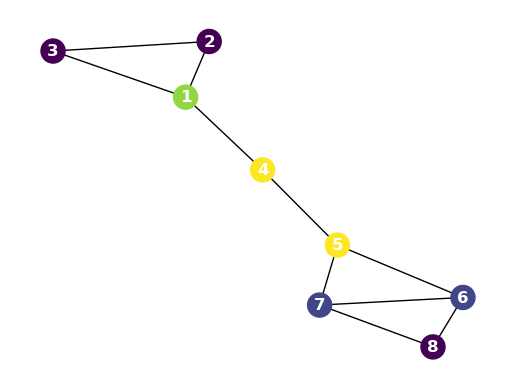

In [45]:
nx.set_node_attributes(G, nx.betweenness_centrality(G), 'betweenness')
pos = nx.spring_layout(G)
ec = nx.draw_networkx(G, pos, nodelist=G.nodes(),
                         node_color=[G.nodes[n]["betweenness"] for n in G.nodes()], 
                         node_shape = '.', node_size=1200, font_color="white", font_weight="bold")
plt.colorbar(nc)
plt.axis('off')
plt.show()

The node with the **lowest degree** is the one with the **highest betweeness centrality**. 

This concept also translates to edges. In particular, edge betweeness is the number of shortest paths that pass through an edge. This brings us to ...

### The quaker communities

Community detection is a common class of methods applied to graphs. 
Two important algorithms:
* **Girvan Newman**
* **Louvain**

#### Girvan Newman
**Idea:** Edges possessing high betweeness centrality separate communities. Let's apply this on our toy sample graph (G) to get a better understanding of the idea.

The algorithm starts with the entire graph and then it iteratively removes the edge with the highest betweeness.

In [51]:
'''
- girvan_newman(graph) --> applyied Girvan Newman & returns a generator for traversing communities (community = list of nodes)
- itertools.islice(comp, 4) retrieves the first 4 iterations (steps) from the generator.  iteration corresponds to a new set of 4 communities

'''
comp = girvan_newman(G)
it = 0
for communities in itertools.islice(comp, 4):
    it +=1
    print('Iteration', it)
    print(tuple(sorted(c) for c in communities)) 

Iteration 1
([1, 2, 3, 4], [5, 6, 7, 8])
Iteration 2
([1, 2, 3], [4], [5, 6, 7, 8])
Iteration 3
([1, 2, 3], [4], [5], [6, 7, 8])
Iteration 4
([1], [2, 3], [4], [5], [6, 7, 8])


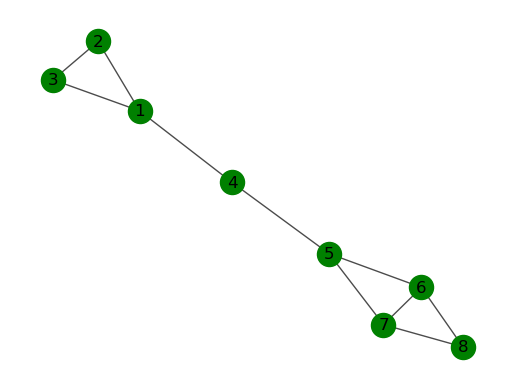

In [47]:
visualize_graph(G,alpha=0.7)

#### The [Louvain method](https://en.wikipedia.org/wiki/Louvain_Modularity)

Another clustering algorithm and has become a standard algorithm in the data scientist toolbox.   
**Idea:** It proceeds the other way around: initially every node is considered as a community. The communities are traversed, and for each community it is tested whether by joining it to a neighboring community, we can obtain a better clustering. 

In [53]:
'''
- community_louvain.best_partition(graph) 
    - computes the partition of the nodes in the graph.
    - return partition i-e a dict where keys are nodes & values are community_id (0,1,..) i-e {node: community_id}. E.g., {node-1: 0, node-2: 0, node-3: 1, ...}

'''
partition = community_louvain.best_partition(quakerG)
print(partition)
# add it as an attribute to the nodes
for n in quakerG.nodes:
    quakerG.nodes[n]["louvain"] = partition[n] # assign community id attribute to each node

{'George Keith': 0, 'Robert Barclay': 0, 'Benjamin Furly': 0, 'Anne Conway Viscountess Conway and Killultagh': 0, 'Franciscus Mercurius van Helmont': 0, 'William Penn': 10, 'George Fox': 2, 'George Whitehead': 3, 'William Bradford': 10, 'James Parnel': 0, 'Stephen Crisp': 0, 'Peter Collinson': 10, 'John Bartram': 10, 'James Logan': 10, 'Joseph Wyeth': 4, 'Thomas Ellwood': 4, 'Alexander Skene of Newtyle': 5, 'Lilias Skene': 5, 'Dorcas Erbery': 6, 'James Nayler': 6, 'William Mucklow': 2, 'William Dewsbury': 2, 'Edward Burrough': 2, 'John Crook': 2, 'John Audland': 7, 'John Camm': 7, 'Francis Howgill': 6, 'Edward Pyott': 7, 'Charles Marshall': 7, 'Anne Camm': 7, 'Martha Simmonds': 6, 'Richard Farnworth': 6, 'William Crouch': 6, 'Tace Sowle': 10, 'John Bellers': 8, 'Fettiplace Bellers': 8, 'William Rogers': 4, 'Hannah Stranger': 6, 'Isabel Yeamans': 10, 'George Fox the younger': 9, 'Margaret Fell': 9, 'Ellis Hookes': 2, 'William Mead': 9, 'Elizabeth Hooten': 2, 'Thomas Salthouse': 9, 'John

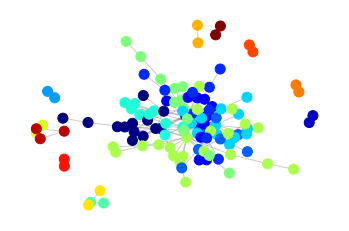

In [54]:
# plot it out
pos = nx.spring_layout(quakerG,k=0.2)
ec = nx.draw_networkx_edges(quakerG, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(quakerG, pos, nodelist=quakerG.nodes(), node_color=[quakerG.nodes[n]["louvain"] for n in quakerG.nodes], 
                            node_size=100, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

Let's get a closer look at a few clusters and show their member's role and period in which they lived

In [61]:
cluster_James = partition['James Nayler'] # return community_id of 'Jame Nayler' node from 'partition' dict that maps {node:community_id}
print(f"community_id of James Nayler is: {cluster_James}\n")

print(f"All nodes belonging to community_id '{cluster_James}':")
# Take all the nodes that belong to James' community
members_c = [q for q in quakerG.nodes if partition[q] == cluster_James]
# get info about these quakers
for quaker in members_c:
    print(" - ", quaker, 'who is', quakerG.nodes[quaker]['Role'], 'and died in ',quakerG.nodes[quaker]['Deathdate'])

community_id of James Nayler is: 6

All nodes belonging to community_id '6':
 -  Dorcas Erbery who is Quaker preacher and died in  1659
 -  James Nayler who is Quaker preacher and writer and died in  1660
 -  Francis Howgill who is Quaker activist and died in  1669
 -  Martha Simmonds who is Quaker and author and died in  1665
 -  Richard Farnworth who is Quaker preacher and writer and died in  1666
 -  William Crouch who is Quaker leader and writer and died in  1711
 -  Hannah Stranger who is Quaker missionary and died in  1671
 -  Gervase Benson who is Quaker leader and died in  1679
 -  Robert Rich who is Quaker adherent and sectary and died in  1679
 -  Anthony Pearson who is Quaker administrator and died in  1666
 -  William Tomlinson who is religious writer and died in  1696
 -  Richard Hubberthorne who is Quaker activist and died in  1662
 -  Thomas Aldam who is Quaker preacher and writer and died in  1660


In [62]:
cluster_Lydia = partition['Lydia Lancaster']
# Take all the nodes that belong to Lydia's cluster
members_c = [q for q in quakerG.nodes if partition[q] == cluster_Lydia]
# get info about these quakers
for quaker in members_c:
    print(quaker, 'who is', quakerG.nodes[quaker]['Role'], 'and died in ',quakerG.nodes[quaker]['Deathdate'])

Lydia Lancaster who is Quaker minister and died in  1761
Grace Chamber who is Quaker minister and died in  1762


### Homophily in quakers 
How likely is it that two quakers who have the same attribute are linked?

Try to measure the similarity of connections in the graph with respect to a given attribute.   
*Intuition: Like correlation, but translated to graphs.*

In [64]:
'''
Assortativity:
    - measures tendency of nodes to connect with others that have similar attribute (e.g, Gender).
    - returna single value for entire graph against a given attribute
        - nx.attribute_assortativity_coefficient() --> used for categorical attributes (e.g, gender, color)
        - nx.numeric_assortativity_coefficient() --> used for numeric attributes (e.g, age, deathdate)

'''
# for categorical attributes
nx.attribute_assortativity_coefficient(quakerG, 'Gender')

0.1882377889305155

In [65]:
nodes.groupby('Gender').size()

Gender
female    22
male      97
dtype: int64

There is no notion of *gender homophily* in this network, which makes sense due to the following:
* Couples
* Gender imbalance

However, there exists **age homophily**: quakers that died in the same period are more likely to be linked

In [66]:
# for numerical attributes, values must be integers
nx.numeric_assortativity_coefficient(quakerG, 'Deathdate')

0.5841284189309789

### Few Exercises
1. Visually determine the diameter of the small graph we built at the beginning (G) and then check you got it right.
2. Experiment with the Girvan Newman algorithm on the Quaker (quakerG) network.
3. Compute role homophily in the Quaker network.   
*Hint: You can either do it based on the given roles you have or develop a more coarse categorisation of roles and repeat your analysis after.*

The diameter of the graph is: 5


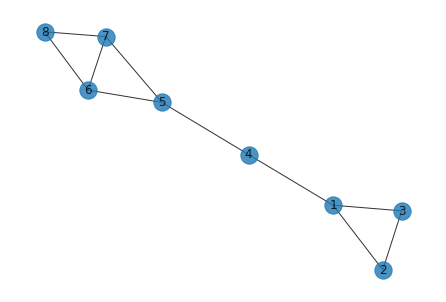

In [ ]:
#### Q1
# Graph built at the beginning
G = nx.Graph() # for a directed graph use nx.DiGraph()
G.add_node(1)
G.add_nodes_from(range(2,9))  # add multiple nodes at once
G.add_edge(1,2)
edges = [(2,3), (1,3), (4,1), (4,5), (5,6), (5,7), (6,7), (7,8), (6,8)]
G.add_edges_from(edges)
nx.draw_spring(G, with_labels=True,  alpha = 0.8)

# Ensure the graph is connected
if nx.is_connected(G):
    # Compute the diameter
    diameter = nx.diameter(G)
    print(f"The diameter of the graph is: {diameter}")
else:
    print("The graph is not connected. Diameter is undefined.")

**Quiz A: Given the following adjacency matrix of a graph:**

<img src="imgs/quizA.png">

1. A is a directed graph with average in-degree 4/3
2. A is an undirected graph with average degree 4/3
3. A is a directed graph with average in-degree 1
4. A is an undirected graph with average degree 1

In [ ]:
'''
Correct: 1

- It is directed graph. in-degree of a node (other nodes pointing toward it) is sum of its col. So, in-degree for node-0 =0+0+1= 1, node-1= 2, node-2= 1. So, avg in-degree = 1+2+1/3 = 4/3

'''

**Quiz B: In a horror scenario, your lost luggage is landing at an airport and being loaded to another random flight and transferred to another airport. This has been going on for months. Given a very large number of iterations, which of the following metrics gives you the probability that your luggage ends up in Geneva airport?**

1. Closeness centrality
2. Page rank
3. Betweenness centrality
4. Katz similarity

In [ ]:
'''
Correct: "2. Page rank"

PageRank is the steady state Markov chain induced by the network. it calculates the fraction of time a random walker will have spent in node i, after a very long (→∞) random walk
It provides the likelihood of being at a particular node (airport) after a large number of random steps, which directly corresponds to the probability that your luggage ends up in Geneva airport.

'''

### Take it further 
Course at Stanford taught by Jure Leskovec: http://web.stanford.edu/class/cs224w/

(Better) alternative to NetworkX, see igraph: http://igraph.org/python/

For larger graph analysis:

* Apache GraphX: https://spark.apache.org/graphx/
* Apache Giraph: http://giraph.apache.org
* Webgraph: http://webgraph.di.unimi.it/
* SNAP: http://snap.stanford.edu/snap/
* Graph tool: https://graph-tool.skewed.de
* Network kit: https://networkit.iti.kit.edu/api/structures.html
* Pajek: http://mrvar.fdv.uni-lj.si/pajek/
* Network Workbench: http://nwb.cns.iu.edu